## Industry Review

- Industry Review – Current practices, Background Research

- Literature Survey - Publications, Application, past and undergoing research

## Dataset and Domain

##### Data Dictionary

In [1]:
#important libraries
#importing the necessary packages
import pandas as pd
import string
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings(action="ignore")
%matplotlib inline

# Read the data set 

In [2]:
bank_df=pd.read_csv("bank-additional-full.csv",sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### bank client data:
1.	age (numeric)
2.	job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4.	education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6.	housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7.	loan: has personal loan? (categorical: 'no',' yes',' unknown')

#### related with the last contact of the current campaign:
8.	contact: contact communication type (categorical: 'cellular', 'telephone')
9.	month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	duration: last contact duration, in seconds (numeric). 

#### other attributes:

12.	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	previous: number of contacts performed before this campaign and for this client (numeric)
15.	poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16.	emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.	cons.price.idx: consumer price index - monthly indicator (numeric)
18.	cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19.	euribor3m: euribor 3 month rate - daily indicator (numeric)
20.	nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21.	y - has the client subscribed a term deposit? (binary: 'yes','no')

## Let's Get into the DataSet :

In [3]:
#checking the shape of the dataset 
bank_df.shape

(41188, 21)

Note : We have 41188 records in  our dataset with 21 features

In [4]:
#Extract all the columns name from the dataset
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Variable categorization

In [5]:
#let's get in to the data information with datatypes
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Let us check out the individual data types
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
#Let us replace our target variable with binary values 0 as 'No' and 1 as 'Yes'
bank_df['y']=bank_df['y'].replace(['yes','no'],[1,0])
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
#as by default our target variable is a categorical data we will change our datatype to categorical 
bank_df['y']=bank_df['y'].astype('object')

In [9]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
#Les's extract all the categorical and the numerical columns for the further Analysis
df_categorical=bank_df.select_dtypes(object)
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0


In [11]:
df_numerical=bank_df.select_dtypes(include=np.number)
df_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [12]:
categorical_columns=df_categorical.columns
numerical_columns=df_numerical.columns

In [13]:
print("The number of categorical columns is: ",len(categorical_columns))
print("The columns are:",list(categorical_columns))

The number of categorical columns is:  11
The columns are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [14]:
print("The number of numerical columns is: ",len(numerical_columns))
print("The columns are:",list(numerical_columns))

The number of numerical columns is:  10
The columns are: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Note : We Have 11 Categorical Column and 10 Numerical column 

# Data Pre Processing Exploratory Data Analysis :

In [15]:
#Let's check the null values 
number_of_missing_values = bank_df.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (bank_df.isna().sum()*100/bank_df.isna().count()).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
y,0,0.0
day_of_week,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0


## OBSERVATION :

As we can clearly observe from the above cell there are no missing value present in any attribute.

### Summerize the numerical column

In [16]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Summerize the categorical column percentages

In [17]:
print('% Values in each categorical columns in the dataset')
for k in categorical_columns:
    print('\n% Values in columns : ',k)
    print((bank_df[k].value_counts()/len(bank_df[k])*100))

% Values in each categorical columns in the dataset

% Values in columns :  job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

% Values in columns :  marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

% Values in columns :  education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64

% Values in columns :  default
no         79.120132
unknown    20.872584
yes         0.00

- Alternate sources of data that can supplement the core dataset (at least 2-3 columns)



- Project Justification - Project Statement, Complexity involved, Project Outcome –Commercial, Academic or Social value

In [132]:
df_numerical.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

### Graphical Representation of Outliers

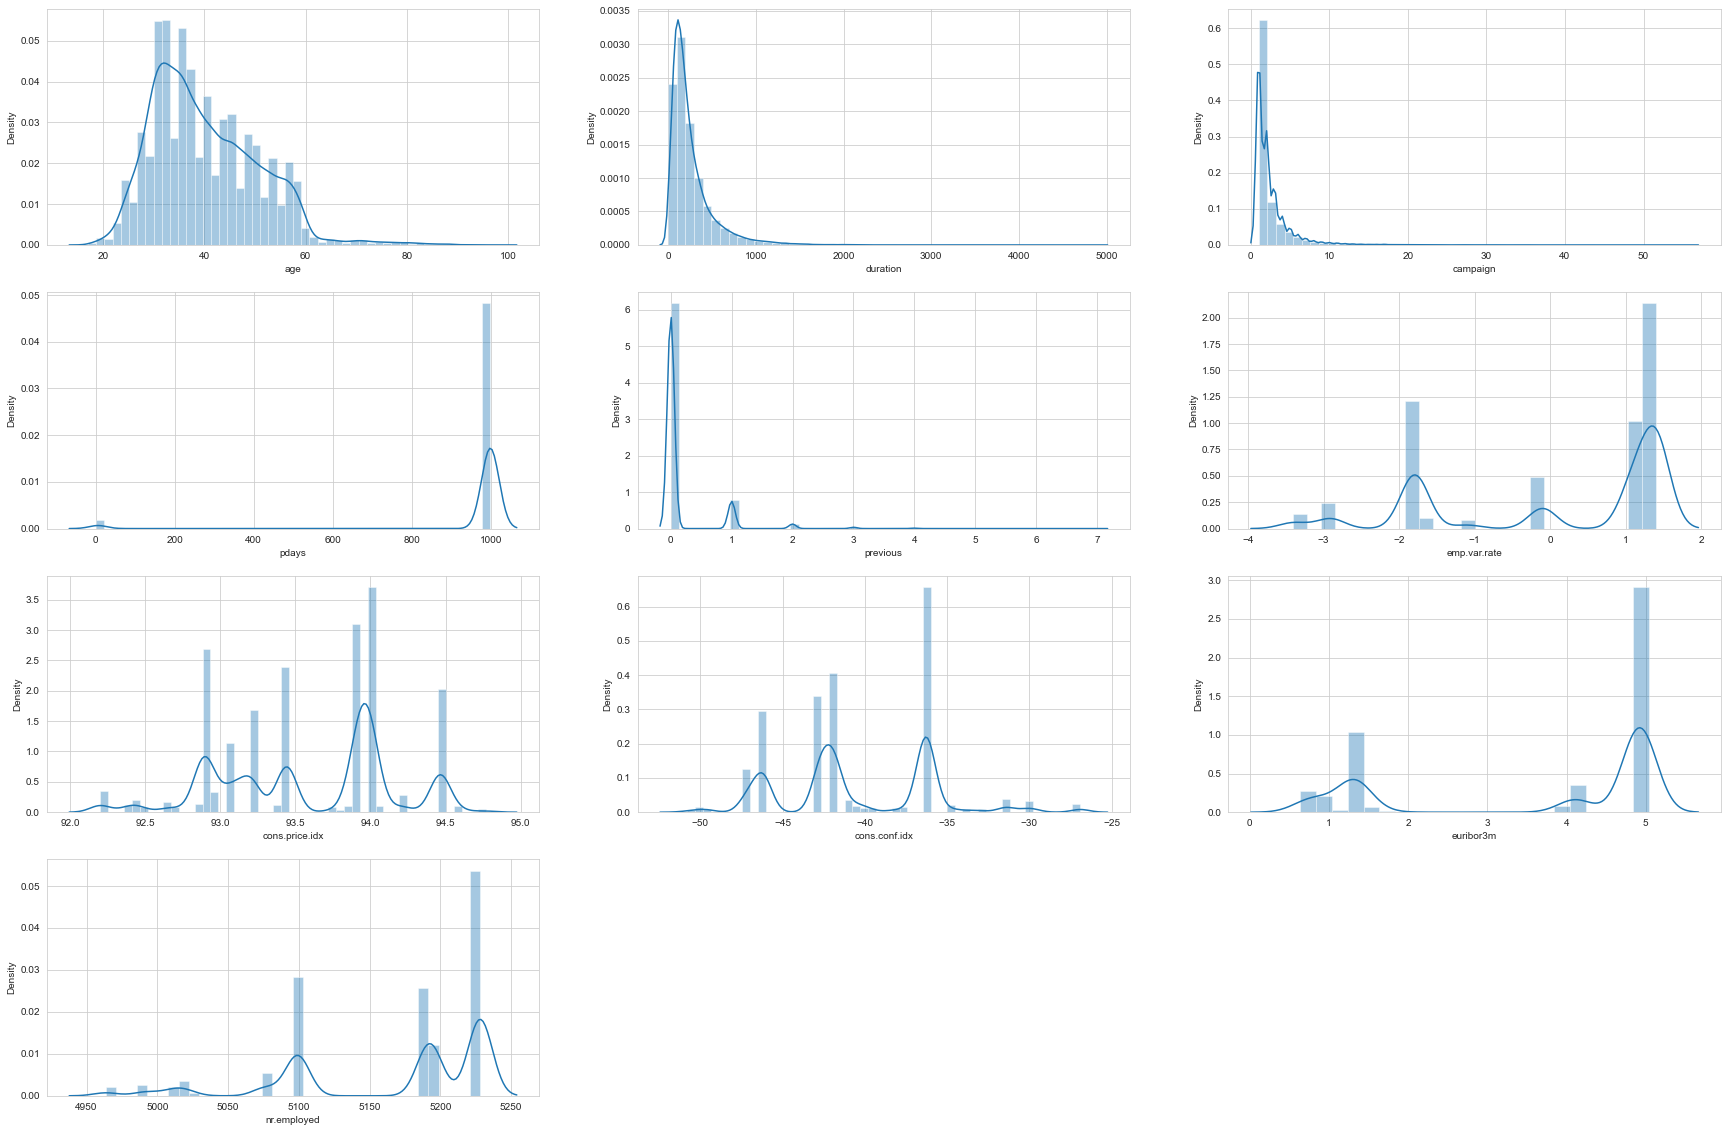

In [133]:
plt.figure(figsize=(30,20))
s=1
for p in numerical_columns:
    plt.subplot(4,3,s)
    sns.distplot(df_numerical[p])
    s+=1

### Treatment of Outliers by Powertransform :

In [134]:
from sklearn.preprocessing import PowerTransformer

In [135]:
pt=PowerTransformer()

In [136]:
bank_pwrtransformed_data=pd.DataFrame(pt.fit_transform(df_numerical),columns=df_numerical.columns)

In [137]:
bank_pwrtransformed_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.427459,0.389913,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827
1,1.492292,-0.234770,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827
2,-0.158076,0.225113,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827
3,0.150155,-0.220434,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827
4,1.427459,0.579397,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827


## Graphical Representation after Outlier Treatment :

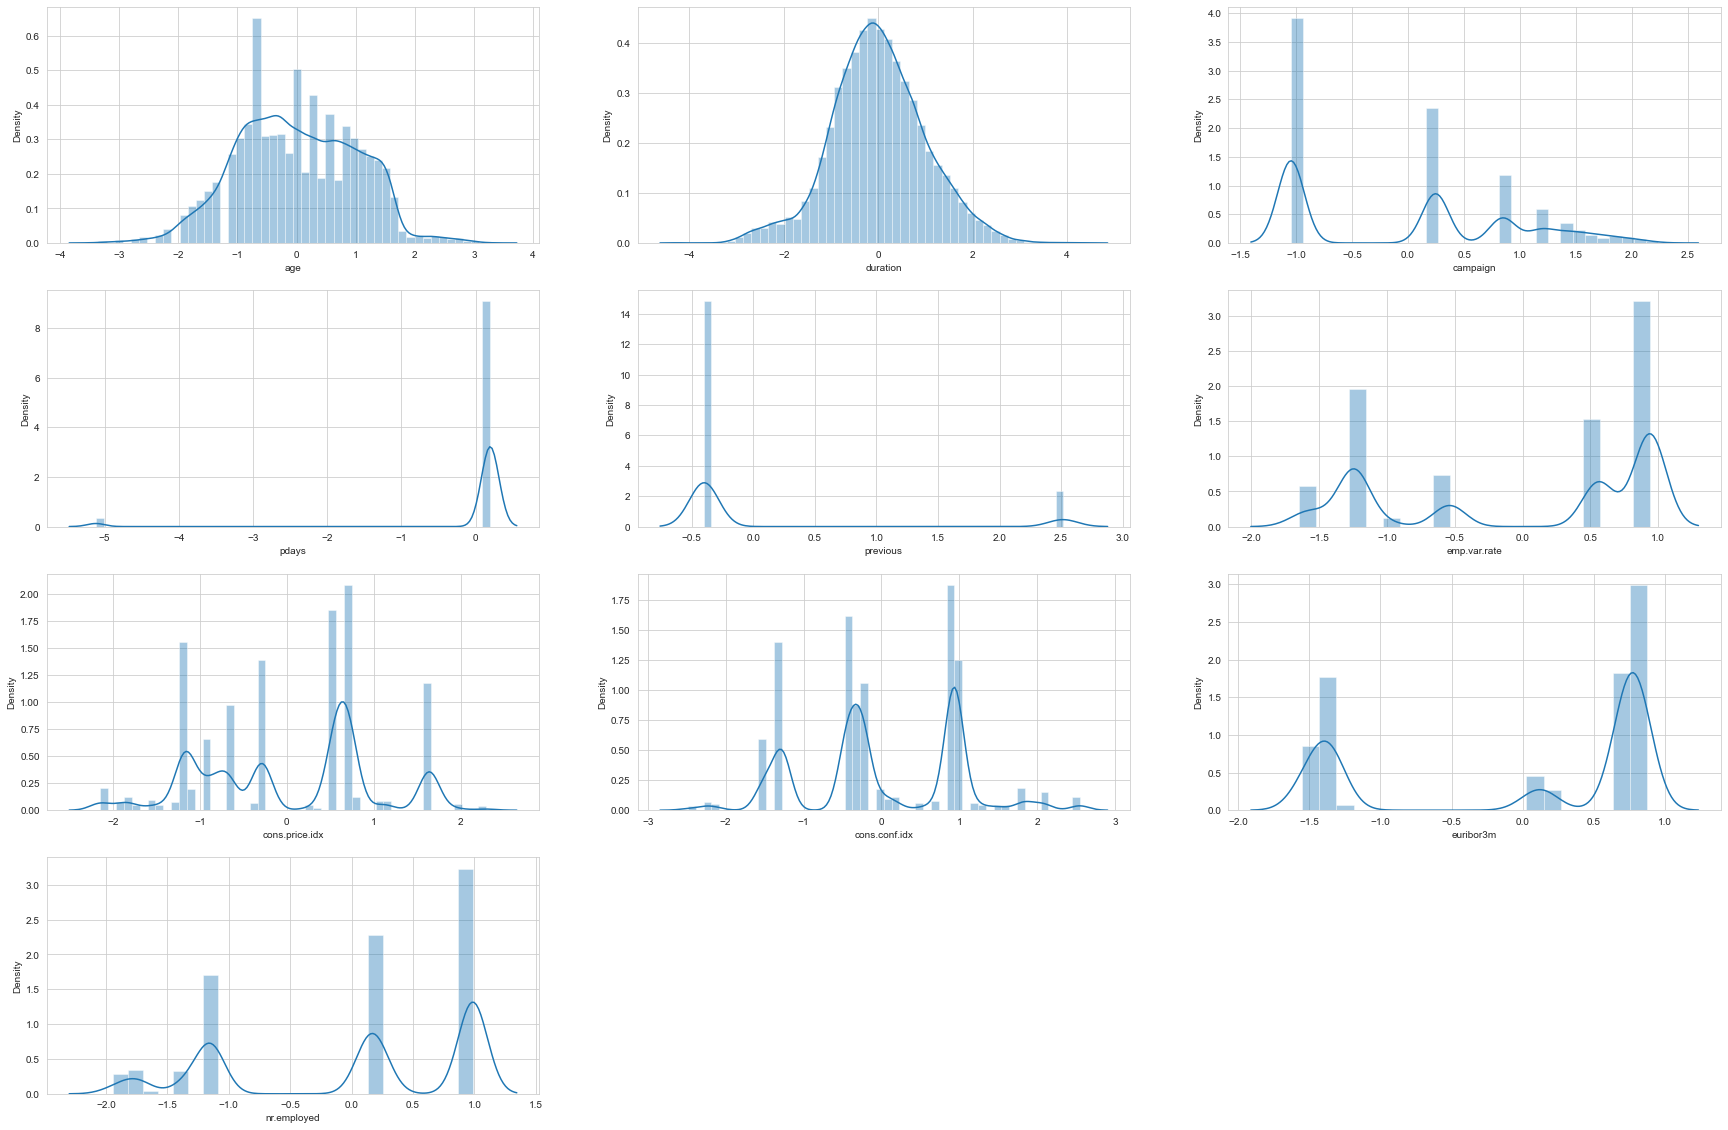

In [138]:
plt.figure(figsize=(30,20))
s=1
for p in bank_pwrtransformed_data:
    plt.subplot(4,3,s)
    sns.distplot(bank_pwrtransformed_data[p])
    s+=1

_________________________________________________________________________________________________

# `` Statistical Analysis ``

 **[Importing Statistical Libraries](#lib)**                 
 **[Chi-Square Test for Independence](#Chi)**   
 **[Data Frame for Chi-Square Test for Independence](#DataFrame)**              
 **[Mann-Whitney U Test](#Mann)**

<a id="lib"></a>
###  Importing Statistical Libraries

In [139]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare


import scipy.stats
import statsmodels.stats.multicomp as mc


In [140]:
bank_df.select_dtypes(include=object).head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0


<a id="Chi"></a>
## `-------------Chi-Square Test for Independence------------------`

###### Chi-Square Test for Independence for attributes **`job`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`job`** and **`target variable (y)`** are **Independent.**<br>
H<sub>1</sub>: The variables **`job`** and **`target variable (y)`** are **Dependent.**

In [141]:
table_job = pd.crosstab(bank_df['y'],bank_df['job'])
table_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
0,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293
1,1352,638,124,106,328,434,149,323,275,730,144,37


In [142]:
observed_job_value = table_job.values
observed_job_value

array([[9070, 8616, 1332,  954, 2596, 1286, 1272, 3646,  600, 6013,  870,
         293],
       [1352,  638,  124,  106,  328,  434,  149,  323,  275,  730,  144,
          37]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 11, calculating the critical value.

In [143]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 11), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 19.6751


i.e. if the chi-square value is greater than  19.6751 then we reject the null hypothesis.

In [144]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_job_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 961.2424403289554
p-value: 4.189763287563861e-199
Degrees of freedom: 11
Expected values: [[9247.91822861 8211.49830048 1291.97552685  940.58657862 2594.59920365
  1526.23482568 1260.91842284 3521.87559483  776.42760027 5983.37292415
   899.76867049  292.82412353]
 [1174.08177139 1042.50169952  164.02447315  119.41342138  329.40079635
   193.76517432  160.08157716  447.12440517   98.57239973  759.62707585
   114.23132951   37.17587647]]


The above output shows that the chi-square test statistic is greater than 19.6751 and the p-value is less than 0.05, thus we reject the null hypothesis. 

#### Conclusion:The variables `job` and `target variable (y)` are  **Dependent.**

_________________________________________________________________________________________________

###### Chi-Square Test for Independence for attributes **`marital status`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`marital status`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`marital status`** and **`target variable (y)`** are **`Dependent`**.

In [145]:
table_marital = pd.crosstab(bank_df['y'],bank_df['marital'])
table_marital

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


In [146]:
observed_marital_value = table_marital.values
observed_marital_value

array([[ 4136, 22396,  9948,    68],
       [  476,  2532,  1620,    12]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 3, calculating the critical value.

In [147]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 7.8147


i.e. if the chi-square value is greater than  7.8147 then we reject the null hypothesis.

In [148]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_marital_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 122.65515182252989
p-value: 2.068014648442211e-26
Degrees of freedom: 3
Expected values: [[4.09243896e+03 2.21197568e+04 1.02648165e+04 7.09876663e+01]
 [5.19561037e+02 2.80824318e+03 1.30318345e+03 9.01233369e+00]]


The above output shows that the chi-square test statistic is greater than 7.8147 and the p-value is less than 0.05, thus we reject the null hypothesis. 

#### Conclusion:The variables `marital status` and `target variable (y)` are  **Dependent.**

___________________________________________________________________________________________

###### Chi-Square Test for Independence for attributes **`education`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`education`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`education`** and **`target variable (y)`** are **`Dependent`**.

In [149]:
table_education = pd.crosstab(bank_df['y'],bank_df['education'])
table_education

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
0,3748,2104,5572,8484,14,4648,10498,1480
1,428,188,473,1031,4,595,1670,251


In [150]:
observed_education_value= table_education.values
observed_education_value

array([[ 3748,  2104,  5572,  8484,    14,  4648, 10498,  1480],
       [  428,   188,   473,  1031,     4,   595,  1670,   251]],
      dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 7, calculating the critical value.

In [151]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 7), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 14.0671


i.e. if the chi-square value is greater than  14.0671 then we reject the null hypothesis.

In [152]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_education_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 193.10590454149565
p-value: 3.3051890144025054e-38
Degrees of freedom: 7
Expected values: [[3.70555618e+03 2.03379664e+03 5.36400554e+03 8.44309556e+03
  1.59722249e+01 4.65235418e+03 1.07972240e+04 1.53599563e+03]
 [4.70443819e+02 2.58203360e+02 6.80994464e+02 1.07190444e+03
  2.02777508e+00 5.90645819e+02 1.37077595e+03 1.95004370e+02]]


The above output shows that the chi-square test statistic is greater than 14.0671 and the p-value is less than 0.05, thus we reject the null hypothesis. 

#### Conclusion:The variables `education` and `target variable (y)` are  **Dependent.**

_____________________________________________________________________________________

###### Chi-Square Test for Independence for attributes **`default`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`default`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`default`** and **`target variable (y)`** are **`Dependent`**.

In [153]:
table_default = pd.crosstab(bank_df['y'],bank_df['default'])
table_default

default,no,unknown,yes
y,,,
0,28391,8154,3
1,4197,443,0


In [154]:
observed_default_value = table_default.values
observed_default_value

array([[28391,  8154,     3],
       [ 4197,   443,     0]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 2, calculating the critical value.

In [155]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 5.9915


i.e. if the chi-square value is greater than   5.9915 then we reject the null hypothesis.

In [156]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_default_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 406.5775146420093
p-value: 5.1619579513916376e-89
Degrees of freedom: 2
Expected values: [[2.89168259e+04 7.62851209e+03 2.66203749e+00]
 [3.67117413e+03 9.68487909e+02 3.37962513e-01]]


The above output shows that the chi-square test statistic is greater than 5.9915 and the p-value is less than 0.05, thus we reject the null hypothesis. 

#### Conclusion:The variables `default` and `target variable (y)` are  **Dependent.**

________________________

###### Chi-Square Test for Independence for attributes **`housing`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`housing`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`housing`** and **`target variable (y)`** are **`Dependent`**.

In [157]:
table_housing = pd.crosstab(bank_df['y'],bank_df['housing'])
table_housing

housing,no,unknown,yes
y,,,
0,16596,883,19069
1,2026,107,2507


In [158]:
observed_housing_value = table_housing.values
observed_housing_value

array([[16596,   883, 19069],
       [ 2026,   107,  2507]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 2, calculating the critical value.

In [159]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 5.9915


i.e. if the chi-square value is greater than   5.9915 then we reject the null hypothesis.

In [160]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_housing_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 5.684495858974168
p-value: 0.05829447669453452
Degrees of freedom: 2
Expected values: [[16524.15402544   878.47237059 19145.37360396]
 [ 2097.84597456   111.52762941  2430.62639604]]


The above output shows that the chi-square test statistic is less than 5.9915 and the p-value is greater than 0.05, thus we fail to reject (i.e accept) the null hypothesis. 

#### Conclusion:The variables `housing` and `target variable (y)` are  **Independent.**

________________________________

#### Chi-Square Test for Independence for attributes **`loan`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`loan`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`loan`** and **`target variable (y)`** are **`Dependent`**.

In [161]:
table_loan = pd.crosstab(bank_df['y'],bank_df['loan'])
table_loan

loan,no,unknown,yes
y,,,
0,30100,883,5565
1,3850,107,683


In [162]:
observed_loan_value = table_loan.values
observed_loan_value

array([[30100,   883,  5565],
       [ 3850,   107,   683]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 2, calculating the critical value.

In [163]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 5.9915


i.e. if the chi-square value is greater than   5.9915 then we reject the null hypothesis.

In [164]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_loan_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 1.094027551150338
p-value: 0.5786752870441754
Degrees of freedom: 2
Expected values: [[30125.39089055   878.47237059  5544.13673886]
 [ 3824.60910945   111.52762941   703.86326114]]


The above output shows that the chi-square test statistic is less than 5.9915 and the p-value is greater than 0.05, thus we fail to reject (i.e accept) the null hypothesis. 

#### Conclusion:The variables `loan` and `target variable (y)` are  **Independent.**

__________________________________________________________________________________

#### Chi-Square Test for Independence for attributes **`contact`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`contact`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`contact`** and **`target variable (y)`** are **`Dependent`**.

In [165]:
table_contact = pd.crosstab(bank_df['y'],bank_df['contact'])
table_contact

contact,cellular,telephone
y,,
0,22291,14257
1,3853,787


In [166]:
observed_contact_value = table_contact.values
observed_contact_value

array([[22291, 14257],
       [ 3853,   787]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 1, calculating the critical value.

In [167]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 1), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 3.8415


i.e. if the chi-square value is greater than  3.8415 then we reject the null hypothesis.

In [168]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_contact_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 863.2690807479079
p-value: 9.481264285590743e-190
Degrees of freedom: 1
Expected values: [[23198.7693503 13349.2306497]
 [ 2945.2306497  1694.7693503]]


The above output shows that the chi-square test statistic is greater than 3.8415 and the p-value is less than 0.05, thus we reject the null hypothesis. 

#### Conclusion:The variables `contact` and `target variable (y)` are  **Dependent.**

_________________________

#### Chi-Square Test for Independence for attributes **`month`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`month`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`month`** and **`target variable (y)`** are **`Dependent`**.

In [169]:
table_month = pd.crosstab(bank_df['y'],bank_df['month'])
table_month

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
0,2093,5523,93,6525,4759,270,12883,3685,403,314
1,539,655,89,649,559,276,886,416,315,256


In [170]:
observed_month_value = table_month.values
observed_month_value

array([[ 2093,  5523,    93,  6525,  4759,   270, 12883,  3685,   403,
          314],
       [  539,   655,    89,   649,   559,   276,   886,   416,   315,
          256]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 9, calculating the critical value.

In [171]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 9), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 16.919


i.e. if the chi-square value is greater than 16.919 then we reject the null hypothesis.

In [172]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_month_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 3101.1493514116773
p-value: 0.0
Degrees of freedom: 9
Expected values: [[ 2335.49422162  5482.02253083   161.49694086  6365.8189764
   4718.905118     484.49082257 12217.86471788  3639.00524425
    637.11430514   505.78712246]
 [  296.50577838   695.97746917    20.50305914   808.1810236
    599.094882      61.50917743  1551.13528212   461.99475575
     80.88569486    64.21287754]]


The above output shows that the chi-square test statistic is greater than 16.919 and the p-value is less than 0.05, thus we reject the null hypothesis. 

#### Conclusion:The variables `month` and `target variable (y)` are  **Dependent.**

___________________________

#### Chi-Square Test for Independence for attributes **`day_of_week`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`day_of_week	`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`day_of_week	`** and **`target variable (y)`** are **`Dependent`**.

In [173]:
table_day_of_week = pd.crosstab(bank_df['y'],bank_df['day_of_week'])
table_day_of_week

day_of_week,fri,mon,thu,tue,wed
y,,,,,
0,6981,7667,7578,7137,7185
1,846,847,1045,953,949


In [174]:
observed_day_of_week_value = table_day_of_week.values
observed_day_of_week_value

array([[6981, 7667, 7578, 7137, 7185],
       [ 846,  847, 1045,  953,  949]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 4, calculating the critical value.

In [175]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 4), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 9.4877


i.e. if the chi-square value is greater than 9.4877 then we reject the null hypothesis.

In [176]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_day_of_week_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 26.14493907587197
p-value: 2.9584820052785324e-05
Degrees of freedom: 4
Expected values: [[6945.25580266 7554.8623871  7651.58308245 7178.62775566 7217.67097213]
 [ 881.74419734  959.1376129   971.41691755  911.37224434  916.32902787]]


The above output shows that the chi-square test statistic is greater than  9.4877  and the p-value is less than 0.05, thus we reject the null hypothesis. 

#### Conclusion:The variables `month` and `target variable (y)` are  **Dependent.**

_______________________

###### Chi-Square Test for Independence for attributes **`poutcome`** and **`target variable (y)`**

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **`poutcome`** and **`target variable (y)`** are **`Independent`**.<br>
H<sub>1</sub>: The variables **`poutcome`** and **`target variable (y)`** are **`Dependent`**.

In [177]:
table_poutcome = pd.crosstab(bank_df['y'],bank_df['poutcome'])
table_poutcome

poutcome,failure,nonexistent,success
y,,,
0,3647,32422,479
1,605,3141,894


In [178]:
observed_poutcome_value = table_poutcome.values
observed_poutcome_value

array([[ 3647, 32422,   479],
       [  605,  3141,   894]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 2, calculating the critical value.

In [179]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 5.9915


i.e. if the chi-square value is greater than 5.9915 then we reject the null hypothesis.

In [180]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_poutcome_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 4230.5237978319765
p-value: 0.0
Degrees of freedom: 2
Expected values: [[ 3772.99446441 31556.67971254  1218.32582306]
 [  479.00553559  4006.32028746   154.67417694]]


The above output shows that the chi-square test statistic is greater than 5.9915 and the p-value is less than 0.05, thus we reject the null hypothesis. 

#### Conclusion:The variables `poutcome` and `target variable (y)` are  **Dependent.**

___________________________________________

<a id="DataFrame"></a>
## `------ Data Frame for Chi-Square Test for Independence----------`

In [181]:
df_categorical=bank_df.select_dtypes(include=object)
df_categorical.shape

(41188, 11)

In [182]:
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [183]:
Chi_square_test_independence_attribute=pd.DataFrame()

Chi_square_test_independence_attribute['variable_a']=df_categorical.columns

Chi_square_test_independence_attribute['variable_b']=df_categorical.columns[10]

#Degrees of freedom
table=[pd.crosstab(bank_df['y'],df_categorical.iloc[:,i])  for i in range(df_categorical.shape[1])]
table_df=[ table[j].shape[1] for j in range(len(table))]
table_df_updated=[table_df[i]-1  for i in range(len(table_df))]
table_df_updated

Chi_square_test_independence_attribute['df']=table_df_updated

#Critical value

#chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))
#print('Critical value for chi-square test:', chi2_val)
critical_values=[np.abs(round(stats.chi2.isf(q = 0.05, df =Chi_square_test_independence_attribute['df'][i]),4))  for i in range(11)]

Chi_square_test_independence_attribute['Critical Value']=critical_values

#Test Statistic
test_stat=[chi2_contingency(observed = table[i].values, correction = False) for i in range(11)]
test_statistic_value=[test_stat[i]     for i in range (11)]
test_statistic_value_1=[[test_statistic_value[i][j] for i in range(11)]for j in range(1)]
test_statistic_value_1[0]

Chi_square_test_independence_attribute['Test Statistic']=test_statistic_value_1[0]

#P-Value
p_value=[test_stat[i][1]   for i in range(11)]
p_value

Chi_square_test_independence_attribute['P-Value']=p_value

Chi_square_test_independence_attribute['Conclusion']=['Variables  are  Independent' if p > 0.05 else 'Variables  are  Dependent'  for p in Chi_square_test_independence_attribute['P-Value']]

Chi_square_test_independence_attribute.drop(index=10,inplace=True)

Chi_square_test_independence_attribute

,variable_a,variable_b,df,Critical Value,Test Statistic,P-Value,Conclusion
0,job,y,11,19.6751,961.242440,4.189763e-199,Variables are Dependent
1,marital,y,3,7.8147,122.655152,2.068015e-26,Variables are Dependent
2,education,y,7,14.0671,193.105905,3.305189e-38,Variables are Dependent
3,default,y,2,5.9915,406.577515,5.161958e-89,Variables are Dependent
4,housing,y,2,5.9915,5.684496,5.829448e-02,Variables are Independent
5,loan,y,2,5.9915,1.094028,5.786753e-01,Variables are Independent
6,contact,y,1,3.8415,863.269081,9.481264e-190,Variables are Dependent
7,month,y,9,16.9190,3101.149351,0.000000e+00,Variables are Dependent
8,day_of_week,y,4,9.4877,26.144939,2.958482e-05,Variables are Dependent
9,poutcome,y,2,5.9915,4230.523798,0.000000e+00,Variables are Dependent


<a id="Mann"></a>
## `------------------ Mann-Whitney U Test-------------------------`

In [184]:
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0


In [185]:
bank_final=pd.concat([bank_pwrtransformed_data,df_categorical],axis=1)
bank_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,1.427459,0.389913,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,1.492292,-0.234770,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827,...,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,-0.158076,0.225113,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,0.150155,-0.220434,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,1.427459,0.579397,-1.045497,0.195415,-0.397706,0.561017,0.700791,0.911782,0.71366,0.140827,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0


#### Mann Whitney U Test for variable age and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable age.

H<sub>1</sub>: The two populations are not equal for variable age.

In [186]:
 scipy.stats.mannwhitneyu(x=bank_final['age'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=768810324.0, pvalue=4.177118120619642e-131)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable age .


_____________________

#### Mann Whitney U Test for variable duration and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable duration.

H<sub>1</sub>: The two populations are not equal for variable duration.

In [187]:
 scipy.stats.mannwhitneyu(x=bank_final['duration'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=762372168.0, pvalue=7.282266821171232e-153)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable duration .


_________________________

#### Mann Whitney U Test for variable campaign and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable campaign.

H<sub>1</sub>: The two populations are not equal for variable campaign.

In [188]:
 scipy.stats.mannwhitneyu(x=bank_final['campaign'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=895985608.0, pvalue=3.0601724250488146e-49)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable campaign .


___________________________________________

#### Mann Whitney U Test for variable pdays and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable pdays.

H<sub>1</sub>: The two populations are not equal for variable pdays.

In [189]:
 scipy.stats.mannwhitneyu(x=bank_final['pdays'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=1449968804.0, pvalue=0.0)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable pdays .


_____________________________

#### Mann Whitney U Test for variable previous and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable previous.

H<sub>1</sub>: The two populations are not equal for variable previous.

In [190]:
 scipy.stats.mannwhitneyu(x=bank_final['previous'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=231682500.0, pvalue=0.0)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable previous .


_____________

#### Mann Whitney U Test for variable emp.var.rate and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable emp.var.rate.

H<sub>1</sub>: The two populations are not equal for variable emp.var.rate.

In [191]:
 scipy.stats.mannwhitneyu(x=bank_final['emp.var.rate'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=877042356.0, pvalue=6.1862262834707515e-19)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable emp.var.rate .


_____________

#### Mann Whitney U Test for variable cons.price.idx and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable cons.price.idx.

H<sub>1</sub>: The two populations are not equal for variable cons.price.idx.

In [192]:
 scipy.stats.mannwhitneyu(x=bank_final['cons.price.idx'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=780607084.0, pvalue=8.374679993757288e-96)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable cons.price.idx.


_____________________________________

#### Mann Whitney U Test for variable cons.conf.idx and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable cons.conf.idx .

H<sub>1</sub>: The two populations are not equal for variable cons.conf.idx .

In [193]:
 scipy.stats.mannwhitneyu(x=bank_final['cons.conf.idx'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=630663816.0, pvalue=0.0)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable cons.conf.idx.


____________________________

#### Mann Whitney U Test for variable euribor3m and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable euribor3m .

H<sub>1</sub>: The two populations are not equal for variable euribor3m .

In [194]:
 scipy.stats.mannwhitneyu(x=bank_final['euribor3m'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=1011502448.0, pvalue=0.0)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable euribor3m .


____________________________

#### Mann Whitney U Test for variable nr.employed and Target variable (y).

The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable nr.employed .

H<sub>1</sub>: The two populations are not equal for variable nr.employed .

In [195]:
 scipy.stats.mannwhitneyu(x=bank_final['nr.employed'], y=bank_final['y'], use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=1011648640.0, pvalue=0.0)

The above output shows that the the p-value is less than 0.05, thus we reject the null hypothesis. 

### Conclusion:
        Two population are different for variable euribor3m .
